In [1]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

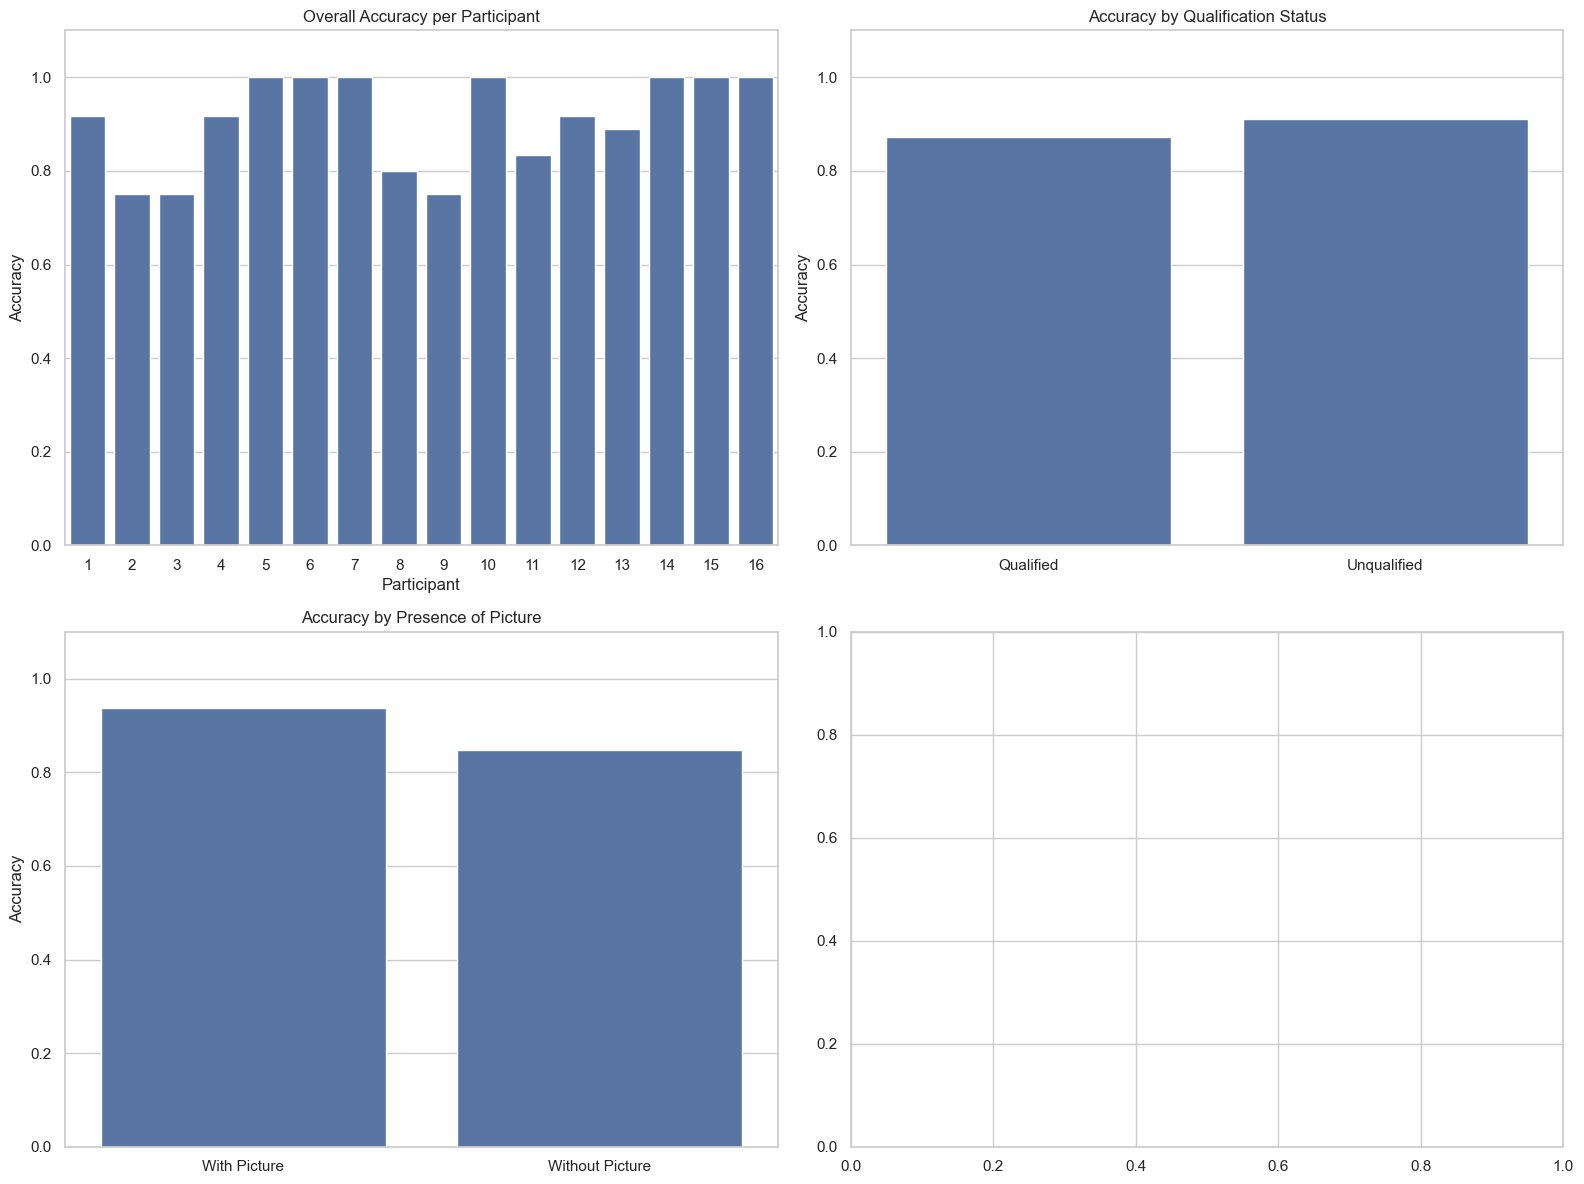

In [1]:
all_files = glob.glob("./eye-tracking/participants/*/subject-*.csv")  
df_list = [pd.read_csv(file) for file in all_files]
all_data = pd.concat(df_list, keys=range(1, len(df_list)+1), names=['Participant', 'Index'])

# Load resume information
resume_info = pd.read_csv('all_resumes_info.csv')

merged_data = pd.merge(all_data.reset_index(level=0), resume_info, left_on='image_file', right_on='Filename')

overall_accuracy = merged_data['response_participant_response'].eq(merged_data['correct_type']).mean()

# Accuracy by participant
participant_accuracy = merged_data.groupby('Participant').apply(
    lambda x: (x['response_participant_response'] == x['correct_type']).mean()
)

# Accuracy by resume qualification
qualified_resumes = merged_data[merged_data['Qualified'] == 'qualified']
unqualified_resumes = merged_data[merged_data['Qualified'] == 'unqualified']

qualified_accuracy = qualified_resumes['response_participant_response'].eq(qualified_resumes['correct_type']).mean()
unqualified_accuracy = unqualified_resumes['response_participant_response'].eq(unqualified_resumes['correct_type']).mean()

# Picture Influence on Accuracy
picture_resumes = merged_data[merged_data['Picture'] == True]
no_picture_resumes = merged_data[merged_data['Picture'] == False]

picture_accuracy = picture_resumes['response_participant_response'].eq(picture_resumes['correct_type']).mean()
no_picture_accuracy = no_picture_resumes['response_participant_response'].eq(no_picture_resumes['correct_type']).mean()

# Plot the accuracy comparison for participants and factors
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Overall Accuracy per Participant
sns.barplot(x=participant_accuracy.index, y=participant_accuracy.values, ax=axs[0, 0])
axs[0, 0].set_title('Overall Accuracy per Participant')
axs[0, 0].set_ylim(0, 1.1)
axs[0, 0].set_ylabel('Accuracy')

# Accuracy by Qualification Status
sns.barplot(x=['Qualified', 'Unqualified'], y=[qualified_accuracy, unqualified_accuracy], ax=axs[0, 1])
axs[0, 1].set_title('Accuracy by Qualification Status')
axs[0, 1].set_ylim(0, 1.1)
axs[0, 1].set_ylabel('Accuracy')

# Accuracy by Presence of Picture
sns.barplot(x=['With Picture', 'Without Picture'], y=[picture_accuracy, no_picture_accuracy], ax=axs[1, 0])
axs[1, 0].set_title('Accuracy by Presence of Picture')
axs[1, 0].set_ylim(0, 1.1)
axs[1, 0].set_ylabel('Accuracy')

# Additional plots (e.g., response time analysis) can be added here

plt.tight_layout()
plt.show()

(79, 141) (79, 141)


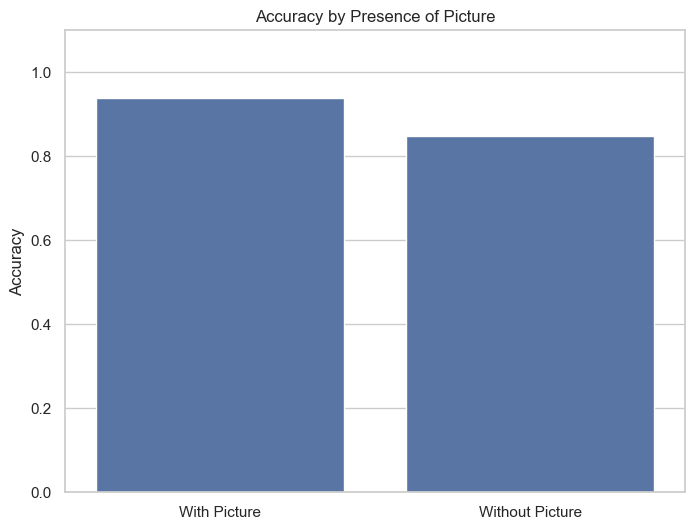

Accuracy for resumes with pictures: 93.67%
Accuracy for resumes without pictures: 84.81%


In [7]:
picture_resumes = merged_data[merged_data['Picture'] == True]
no_picture_resumes = merged_data[merged_data['Picture'] == False]

print(picture_resumes.shape, no_picture_resumes.shape)

picture_accuracy = picture_resumes['response_participant_response'].eq(picture_resumes['correct_type']).mean()
no_picture_accuracy = no_picture_resumes['response_participant_response'].eq(no_picture_resumes['correct_type']).mean()

# Plot the accuracy comparison for picture presence
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x=['With Picture', 'Without Picture'], y=[picture_accuracy, no_picture_accuracy])
plt.title('Accuracy by Presence of Picture')
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.savefig("picture_vs_no_picture_accuracy.png")
plt.show()

# Print the results
print(f"Accuracy for resumes with pictures: {picture_accuracy:.2%}")
print(f"Accuracy for resumes without pictures: {no_picture_accuracy:.2%}")

In [15]:
print(f"Accuracy for QUALIFIED VS UNQUALIFIED: {qualified_accuracy}, {unqualified_accuracy}")
print(f"Accuracy for PICTURE ON  VS PICTURE OFF: {picture_accuracy}, {no_picture_accuracy}")


Accuracy for QUALIFIED VS UNQUALIFIED: 0.8734177215189873, 0.9113924050632911
Accuracy for PICTURE ON  VS PICTURE OFF: 0.9367088607594937, 0.8481012658227848


In [60]:
qualification_counts = merged_data.groupby(['Filename', 'Picture', 'response_participant_response']).size().unstack(fill_value=-1)
qualification_counts.columns = ['ChoosenasUnqualified', 'ChoosenasQualified']
qualification_counts = qualification_counts.reset_index()

qualification_counts['is_qualified'] = qualification_counts['Filename'].apply(lambda x: 'unqualified' not in x)
qualification_counts

,Filename,Picture,ChoosenasUnqualified,ChoosenasQualified,is_qualified
0,qualified_noPic_ goodSort_aisha.png,False,1,4,True
1,qualified_noPic_ goodSort_hannah.png,False,1,3,True
2,qualified_noPic_badSort_david.png,False,2,8,True
3,qualified_noPic_badSort_rahul.png,False,-1,7,True
4,qualified_noPic_badSort_viktor.png,False,2,6,True
5,qualified_noPic_goodSort_emilia.png,False,-1,5,True
6,qualified_pic_ goodSort_aisha.png,True,1,7,True
7,qualified_pic_ goodSort_hannah.png,True,3,6,True
8,qualified_pic_badSort_david.png,True,-1,3,True
9,qualified_pic_badSort_rahul.png,True,-1,6,True


Mean Relative Proportion Chosen as Qualified:
With Picture: 0.48
Without Picture: 0.50

Mean Relative Proportion Chosen as Unqualified:
With Picture: 0.52
Without Picture: 0.50

For Actually Qualified Resumes:
Mean Relative Proportion Chosen as Qualified:
With Picture: 0.92
Without Picture: 0.85

For Actually Unqualified Resumes:
Mean Relative Proportion Chosen as Unqualified:
With Picture: 0.97
Without Picture: 0.86


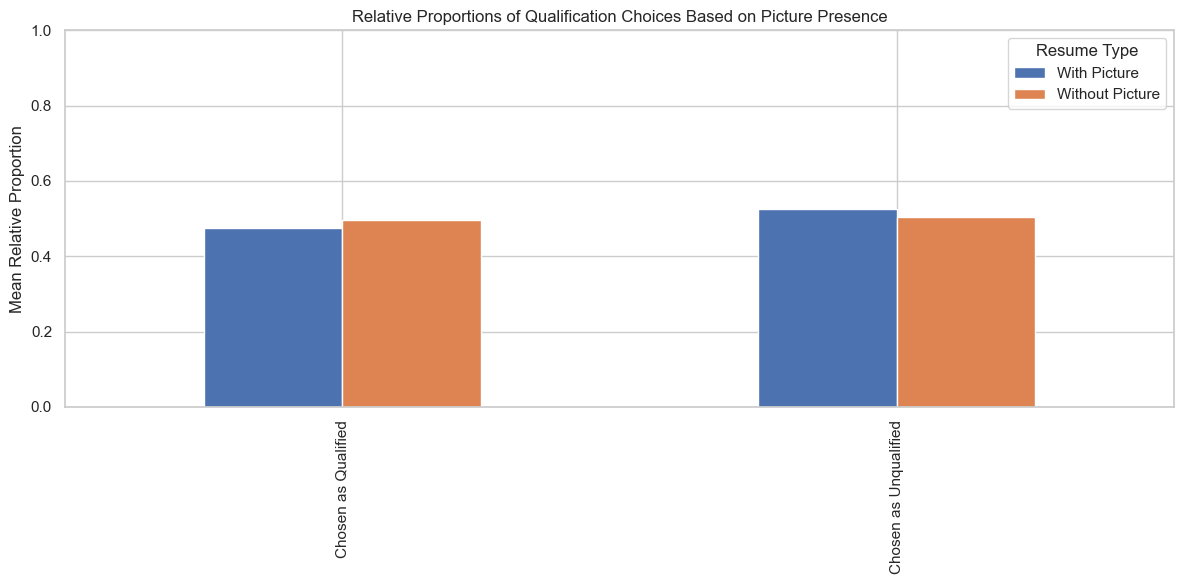


T-test results for Relative Chosen as Qualified (with picture vs without picture):
t-statistic: -0.1171624020287609, p-value: 0.907794402303024

T-test results for Relative Chosen as Unqualified (with picture vs without picture):
t-statistic: 0.1171624020287612, p-value: 0.9077944023030238


In [10]:
df = pd.read_csv('stats_qualified_unqualified.csv')

df['ChoosenasQualified'] = df['ChoosenasQualified'].replace(-1, 0)
df['ChoosenasUnqualified'] = df['ChoosenasUnqualified'].replace(-1, 0)

df['total_votes'] = df['ChoosenasQualified'] + df['ChoosenasUnqualified']
df['RelativeChoosenQualified'] = df['ChoosenasQualified'] / df['total_votes']
df['RelativeChoosenUnQualified'] = df['ChoosenasUnqualified'] / df['total_votes']

with_picture_qualified = df[df['Picture_x'] == True]['RelativeChoosenQualified'].mean()
without_picture_qualified = df[df['Picture_x'] == False]['RelativeChoosenQualified'].mean()
with_picture_unqualified = df[df['Picture_x'] == True]['RelativeChoosenUnQualified'].mean()
without_picture_unqualified = df[df['Picture_x'] == False]['RelativeChoosenUnQualified'].mean()

print("Mean Relative Proportion Chosen as Qualified:")
print(f"With Picture: {with_picture_qualified:.2f}")
print(f"Without Picture: {without_picture_qualified:.2f}")

print("\nMean Relative Proportion Chosen as Unqualified:")
print(f"With Picture: {with_picture_unqualified:.2f}")
print(f"Without Picture: {without_picture_unqualified:.2f}")

actual_qualified = df[df['is_qualified'] == True]
actual_unqualified = df[df['is_qualified'] == False]

print("\nFor Actually Qualified Resumes:")
print("Mean Relative Proportion Chosen as Qualified:")
print(f"With Picture: {actual_qualified[actual_qualified['Picture_x'] == True]['RelativeChoosenQualified'].mean():.2f}")
print(f"Without Picture: {actual_qualified[actual_qualified['Picture_x'] == False]['RelativeChoosenQualified'].mean():.2f}")

print("\nFor Actually Unqualified Resumes:")
print("Mean Relative Proportion Chosen as Unqualified:")
print(f"With Picture: {actual_unqualified[actual_unqualified['Picture_x'] == True]['RelativeChoosenUnQualified'].mean():.2f}")
print(f"Without Picture: {actual_unqualified[actual_unqualified['Picture_x'] == False]['RelativeChoosenUnQualified'].mean():.2f}")

plt.figure(figsize=(12, 6))

data = pd.DataFrame({
    'With Picture': [with_picture_qualified, with_picture_unqualified],
    'Without Picture': [without_picture_qualified, without_picture_unqualified]
}, index=['Chosen as Qualified', 'Chosen as Unqualified'])

data.plot(kind='bar', ax=plt.gca())
plt.title('Relative Proportions of Qualification Choices Based on Picture Presence')
plt.ylabel('Mean Relative Proportion')
plt.ylim(0, 1)
plt.legend(title='Resume Type')
plt.tight_layout()
plt.show()

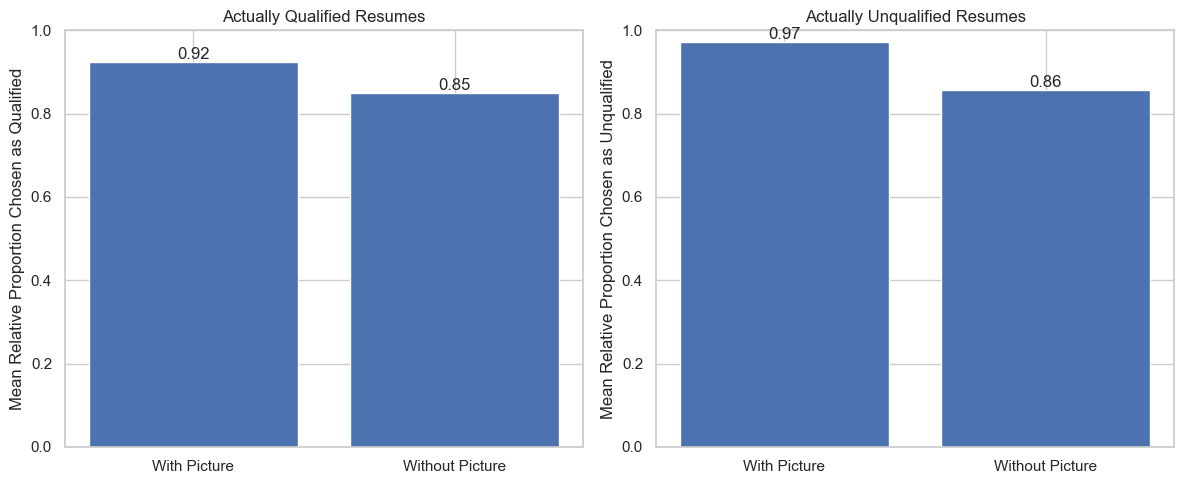

In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

qual_with_pic = actual_qualified[actual_qualified['Picture_x'] == True]['RelativeChoosenQualified'].mean()
qual_without_pic = actual_qualified[actual_qualified['Picture_x'] == False]['RelativeChoosenQualified'].mean()

unqual_with_pic = actual_unqualified[actual_unqualified['Picture_x'] == True]['RelativeChoosenUnQualified'].mean()
unqual_without_pic = actual_unqualified[actual_unqualified['Picture_x'] == False]['RelativeChoosenUnQualified'].mean()


labels = ['With Picture', 'Without Picture']
qual_means = [qual_with_pic, qual_without_pic]
ax1.bar(labels, qual_means)
ax1.set_ylabel('Mean Relative Proportion Chosen as Qualified')
ax1.set_title('Actually Qualified Resumes')
ax1.set_ylim(0, 1)

for i, v in enumerate(qual_means):
    ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom')

unqual_means = [unqual_with_pic, unqual_without_pic]
ax2.bar(labels, unqual_means)
ax2.set_ylabel('Mean Relative Proportion Chosen as Unqualified')
ax2.set_title('Actually Unqualified Resumes')
ax2.set_ylim(0, 1)

for i, v in enumerate(unqual_means):
    ax2.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.savefig("mean_relative_proportions.png")
plt.tight_layout()
plt.show()

In [39]:
def calculate_relative_accuracy(data, chosen_column, qualified_value):
    subset = data[(data['Picture_x'] == data['Picture_x'].unique()[0]) & (data['is_qualified'] == qualified_value)]
    total = subset[chosen_column].sum()
    subset[f'relative_{chosen_column}'] = subset[chosen_column] / subset['total_votes']
    return subset[f'relative_{chosen_column}'].mean(), total

accuracies = {
    'No Picture': {
        'Unqualified': calculate_relative_accuracy(df[df['Picture_x'] == False], 'ChoosenasUnqualified', False),
        'Qualified': calculate_relative_accuracy(df[df['Picture_x'] == False], 'ChoosenasQualified', True)
    },
    'With Picture': {
        'Unqualified': calculate_relative_accuracy(df[df['Picture_x'] == True], 'ChoosenasUnqualified', False),
        'Qualified': calculate_relative_accuracy(df[df['Picture_x'] == True], 'ChoosenasQualified', True)
    }
}

for picture_status, values in accuracies.items():
    print(f"\n{picture_status}:")
    for qualification, (mean, total) in values.items():
        print(f"  {qualification}: Mean relative accuracy: {mean:.2f}, Total votes: {total}")



No Picture:
  Unqualified: Mean relative accuracy: 0.86, Total votes: 34
  Qualified: Mean relative accuracy: 0.85, Total votes: 33

With Picture:
  Unqualified: Mean relative accuracy: 0.97, Total votes: 38
  Qualified: Mean relative accuracy: 0.92, Total votes: 36


/var/folders/sx/cqhmbh993qdcxtbfnsqx7_rh0000gn/T/ipykernel_1219/3496857901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[f'relative_{chosen_column}'] = subset[chosen_column] / subset['total_votes']
/var/folders/sx/cqhmbh993qdcxtbfnsqx7_rh0000gn/T/ipykernel_1219/3496857901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[f'relative_{chosen_column}'] = subset[chosen_column] / subset['total_votes']
/var/folders/sx/cqhmbh993qdcxtbfnsqx7_rh0000gn/T/ipykernel_1219/3496857901.py:4: SettingWi